In [18]:
from vyper.user import Model
import pandas as pd
from sklearn.utils import shuffle
from vyper.user.explorer import DataProfiler
from openpyxl import Workbook

import math
import numpy as np
from vyper.utils.tools import StatisticalTools as st
from sklearn.preprocessing import OrdinalEncoder
import scipy as stats
from scipy.stats import chi2
from scipy.stats import uniform, randint
from sklearn.preprocessing import StandardScaler
from varclushi import VarClusHi
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

In [19]:
from sklearn.cluster import DBSCAN, KMeans
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.decomposition import PCA
from matplotlib.cm import viridis
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator
from yellowbrick.cluster import KElbowVisualizer

In [20]:
class dbs:
    def __init__(self, data):
        self.df = pd.read_csv(data)
        # self.df = self.df.iloc[:1000, :]

    def get_shape(self):
        return self.df.shape

    def get_df(self):
        return self.df

    def nearestneigh(self, n_neighbors):
        neigh = NearestNeighbors(n_neighbors=n_neighbors)
        nbrs = neigh.fit(self.df)
        distances, indices = nbrs.kneighbors(self.df)
        return distances

    @staticmethod
    def get_eps(distances):
        distances = np.sort(distances, axis=0)
        distances = distances[:, 1]
        i = np.arange(len(distances))
        kneec = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')
        kneec.plot_knee()
        return kneec.knee_y

    def min_samples_selection(self, eps, multiple, maxK_per, minK_per=5, rand_sample_prop=0.2):
        sample_data = self.df.sample(frac=rand_sample_prop)
        minK=int((minK_per/100)*(sample_data.shape[0]))
        maxK=int((maxK_per/100)*(sample_data.shape[0]))
        nums = list(range(minK, maxK + 1, multiple))
        ss = []
        for i in list(range(minK, maxK + 1, multiple)):
            # print("***size: ", i)
            dbscan = DBSCAN(eps=eps, min_samples=i)
            dbscan.fit(sample_data)
            ss.append(silhouette_score(sample_data, dbscan.labels_))
        return (nums[np.argmax(ss)] / (sample_data.shape[0])) * 100

    def dbscan(self, percent=5, nn=100, ):
        eps = self.get_eps(self.nearestneigh(nn))
        dbscan = DBSCAN(eps=eps, min_samples=int((percent / 100) * (self.df.shape[0])))
        clusters = dbscan.fit_predict(self.df) + 1
        return clusters

    def pca(self, clusters, n_components=2):
        pca = PCA(n_components=n_components)
        principalComponents = pca.fit_transform(self.df)
        principalComponents = pd.DataFrame(data=principalComponents, index=self.df.index, columns=['PC1', 'PC2'])
        principalComponents['cluster'] = clusters
        return principalComponents

    @staticmethod
    def scatter_plot(principalComponents):
        plt.scatter(principalComponents['PC1'], principalComponents['PC2'], c=principalComponents['cluster'],
                    cmap=viridis)
        plt.show()

In [21]:
db = dbs('maurices_oc_preprocessed.csv')

In [22]:
db.get_shape()

(99942, 13)

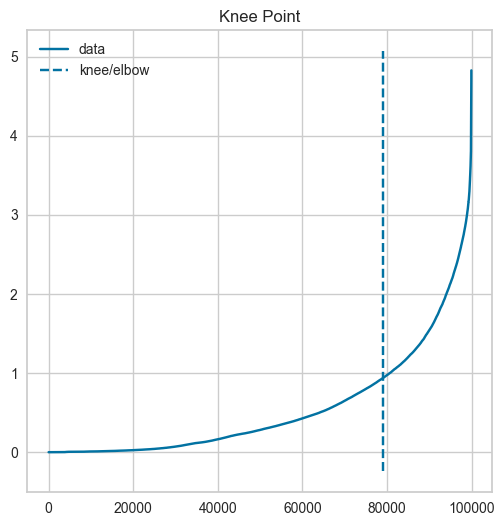

In [23]:
eps=db.get_eps(db.nearestneigh(100))

In [26]:
eps

0.9407747014464055

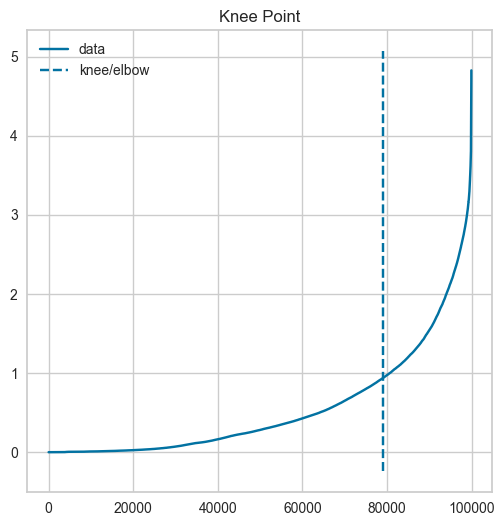

In [24]:
clu=db.dbscan()

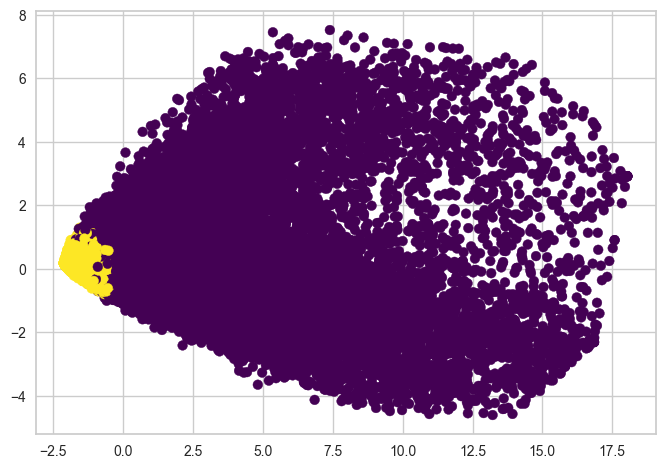

In [25]:
db.scatter_plot(db.pca(clu))